**Visualization of trajectory and energy produced to observe the stability**

In [1]:
import re
import openpyxl

with open('/content/xtb.trj', 'r') as f:
    data = f.read()

pattern = r'energy:\s*([-0-9\.]+)'
matches = re.findall(pattern, data)

# Membuat file excel baru
workbook = openpyxl.Workbook()
worksheet = workbook.active

# Menambahkan header pada file excel
worksheet.cell(row=1, column=1, value="Frame")
worksheet.cell(row=1, column=2, value="Energy")

# Menambahkan data ke file excel dan memberikan nomor urut
for i, match in enumerate(matches, start=1):
    worksheet.cell(row=i+1, column=1, value=i)
    worksheet.cell(row=i+1, column=2, value=match)

# Menyimpan file excel
workbook.save(filename="energy_data.xlsx")

# Menghitung nilai energy minimum dan maksimum
energies = [float(match) for match in matches]
min_energy = min(energies)
max_energy = max(energies)

# Menampilkan hasil analisis
print("Lowest Energy: {:.3f}".format(min_energy))
print("Highest Energy: {:.3f}".format(max_energy))


Lowest Energy: -72.536
Highest Energy: -72.499


Average Energy: -72.50998422075969


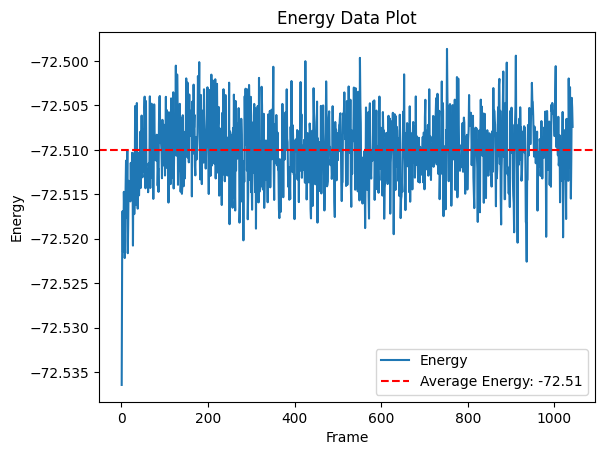

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Membaca file excel yang telah dibuat sebelumnya
df = pd.read_excel("energy_data.xlsx")

# Menghitung rata-rata energi
average_energy = df["Energy"].mean()
print("Average Energy:", average_energy)

# Membuat plot
plt.plot(df["Frame"], df["Energy"], label="Energy")
plt.axhline(y=average_energy, color='r', linestyle='--', label=f"Average Energy: {average_energy:.2f}")
plt.xlabel("Frame")
plt.ylabel("Energy")
plt.title("Energy Data Plot")
plt.legend()

# Menyimpan plot dengan resolusi 600 dpi dan memastikan teks tidak terpotong
plt.savefig("energy_data_plot.png", dpi=600, bbox_inches='tight')

# Menampilkan plot
plt.show()

# Mendownload gambar
files.download("energy_data_plot.png")
